In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import os
print(os.getcwd())

e:\Projects\Justcode\deeplearning-study


In [2]:
os.chdir('./2-1/')

In [97]:
import gc_utils
import init_utils
import reg_utils
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
# # plt.rcParams['image.cmap'] = 'gray'

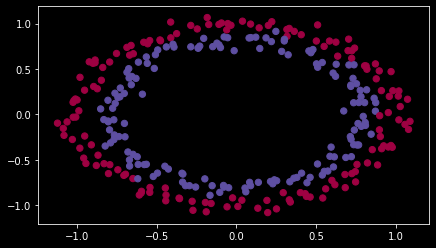

In [5]:
X_train, Y_train, X_test, Y_test = init_utils.load_dataset(is_plot=True)

In [18]:
def init_zeros(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f'W{l}'] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params[f'b{l}'] = np.zeros((layers_dims[l], 1))
    return params

def init_random(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f'W{l}'] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        params[f'b{l}'] = np.zeros((layers_dims[l], 1))
    return params

def init_he(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f'W{l}'] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        params[f'b{l}'] = np.zeros((layers_dims[l], 1))
    return params

In [12]:
def model(X, Y, alpha=0.005, loops=5000, init_method='he'):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    # inintial params
    if init_method == 'zeros':
        params = init_zeros(layers_dims)
    elif init_method == 'random':
        params = init_random(layers_dims)
    elif init_method == 'he':
        params = init_he(layers_dims)
    else:
        print('Error: unexcepted init_method!')
    # start train
    for i in range(loops):
        a3, cache = init_utils.forward_propagation(X, params)
        cost = init_utils.compute_loss(a3, Y)
        costs.append(cost)
        grads = init_utils.backward_propagation(X, Y, cache)
        params = init_utils.update_parameters(params, grads, alpha)
        if (i+1) % 100 == 0:
            print(f'No.{i+1} iteration\'s loss: {cost}')
    plt.plot(costs)
    plt.xlabel('step')
    plt.ylabel('loss')
    plt.title('loss circle')
    plt.show()
    return params

No.100 iteration's loss: 0.6931471805599453
No.200 iteration's loss: 0.6931471805599453
No.300 iteration's loss: 0.6931471805599453
No.400 iteration's loss: 0.6931471805599453
No.500 iteration's loss: 0.6931471805599453
No.600 iteration's loss: 0.6931471805599453
No.700 iteration's loss: 0.6931471805599453
No.800 iteration's loss: 0.6931471805599453
No.900 iteration's loss: 0.6931471805599453
No.1000 iteration's loss: 0.6931471805599453
No.1100 iteration's loss: 0.6931471805599453
No.1200 iteration's loss: 0.6931471805599453
No.1300 iteration's loss: 0.6931471805599453
No.1400 iteration's loss: 0.6931471805599453
No.1500 iteration's loss: 0.6931471805599453
No.1600 iteration's loss: 0.6931471805599453
No.1700 iteration's loss: 0.6931471805599453
No.1800 iteration's loss: 0.6931471805599453
No.1900 iteration's loss: 0.6931471805599453
No.2000 iteration's loss: 0.6931471805599453
No.2100 iteration's loss: 0.6931471805599453
No.2200 iteration's loss: 0.6931471805599453
No.2300 iteration's

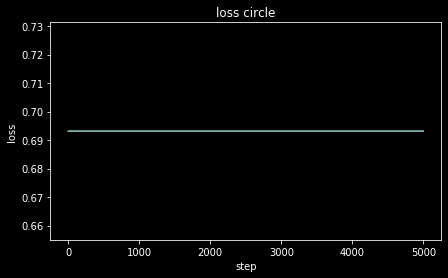

In [14]:
params = model(X_train, Y_train, init_method='zeros')
print('train set')
prediction = init_utils.predict(X_train, Y_train, params)
print('test set')
prediction = init_utils.predict(X_test, Y_test, params)

No.100 iteration's loss: inf
No.200 iteration's loss: inf
No.300 iteration's loss: inf
No.400 iteration's loss: inf
No.500 iteration's loss: inf
No.600 iteration's loss: inf
No.700 iteration's loss: inf
No.800 iteration's loss: inf
No.900 iteration's loss: inf
No.1000 iteration's loss: inf
No.1100 iteration's loss: inf
No.1200 iteration's loss: inf
No.1300 iteration's loss: inf
No.1400 iteration's loss: inf
No.1500 iteration's loss: inf
No.1600 iteration's loss: inf
No.1700 iteration's loss: inf
No.1800 iteration's loss: inf
No.1900 iteration's loss: inf
No.2000 iteration's loss: inf
No.2100 iteration's loss: inf
No.2200 iteration's loss: inf
No.2300 iteration's loss: inf
No.2400 iteration's loss: inf
No.2500 iteration's loss: inf
No.2600 iteration's loss: inf
No.2700 iteration's loss: inf
No.2800 iteration's loss: inf
No.2900 iteration's loss: inf
No.3000 iteration's loss: inf
No.3100 iteration's loss: inf
No.3200 iteration's loss: inf
No.3300 iteration's loss: inf
No.3400 iteration's

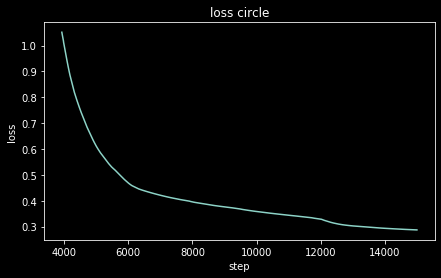

In [69]:
np.random.seed(1)
params = model(X_train, Y_train, alpha=0.001, loops=15000, init_method='random')
print('train set')
prediction = init_utils.predict(X_train, Y_train, params)
print('test set')
prediction = init_utils.predict(X_test, Y_test, params)

No.100 iteration's loss: 0.688314869954039
No.200 iteration's loss: 0.6823212226178333
No.300 iteration's loss: 0.6764708607446656
No.400 iteration's loss: 0.6695060372788639
No.500 iteration's loss: 0.6601353700090945
No.600 iteration's loss: 0.6428209817501477
No.700 iteration's loss: 0.6178396390381038
No.800 iteration's loss: 0.584061858695974
No.900 iteration's loss: 0.5405915106358948
No.1000 iteration's loss: 0.4863021420524793
No.1100 iteration's loss: 0.42560311892779595
No.1200 iteration's loss: 0.3651941480909231
No.1300 iteration's loss: 0.3105988429935184
No.1400 iteration's loss: 0.264874465602396
No.1500 iteration's loss: 0.2283724661121673
No.1600 iteration's loss: 0.1997027874225399
No.1700 iteration's loss: 0.1766506768118275
No.1800 iteration's loss: 0.1587335459189352
No.1900 iteration's loss: 0.1450055538338432
No.2000 iteration's loss: 0.13432806753682064
No.2100 iteration's loss: 0.12582355760348155
No.2200 iteration's loss: 0.116545414818029
No.2300 iteration's 

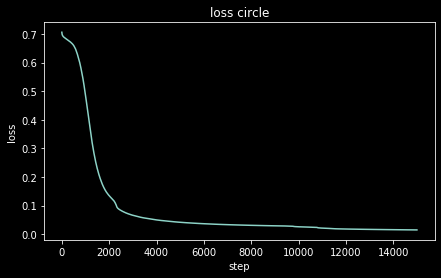

In [76]:
np.random.seed(1)
params = model(X_train, Y_train, alpha=0.06, loops=15000, init_method='he')
print('train set')
prediction = init_utils.predict(X_train, Y_train, params)
print('test set')
prediction = init_utils.predict(X_test, Y_test, params)

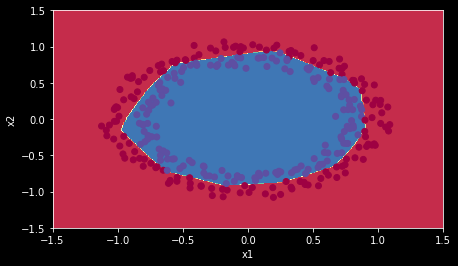

In [102]:
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda X: init_utils.predict_dec(params, X.T), X_train, np.squeeze(Y_train))

(300,)